# Scikit-Plot - Plotting to assist in model building

#### Imports & Versions

In [1]:
import sys
print("Python v.{}".format(sys.version_info[:3]))
print('*'*25)

import numpy as np
print('numpy v.{}'.format(np.__version__))

import pandas as pd
print('pandas v.{}'.format(pd.__version__))

import statsmodels
import statsmodels.api as sm
print('statsmodels v.{}'.format(statsmodels.__version__))

import matplotlib
print('matplotlib v.{}'.format(matplotlib.__version__))
import matplotlib.pyplot as plt
%matplotlib inline

import patsy
from patsy import dmatrices
print('patsy v.{}'.format(patsy.__version__))

import sklearn
print('sklearn v.{}'.format(sklearn.__version__))
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

print('*'*25)
import scikitplot
print('scikitplot v.{}'.format(scikitplot.__version__))
from scikitplot import classifier_factory
import scikitplot.plotters as skplt

Python v.(3, 5, 2)
*************************
numpy v.1.12.1
pandas v.0.19.2
statsmodels v.0.8.0
matplotlib v.2.0.0
patsy v.0.4.1
sklearn v.0.18.1
*************************
scikitplot v.0.2.3


<h1>Review Scikit-Plot Functions API Plots</h1>
<h3>Binary Classification, Principal model is Logistic Regression, statsmodel affiars dataset</h3>

In [24]:
dta = sm.datasets.fair.load_pandas().data #statsmodel affairs dataset
dta['affair'] = (dta.affairs > 0).astype(int) #change the affairs datapoint to a single, binary class
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ',
                   dta, return_type='dataframe') 
y = np.ravel(y)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [26]:
logreg = LogisticRegression()

In [27]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Confusion Matrix

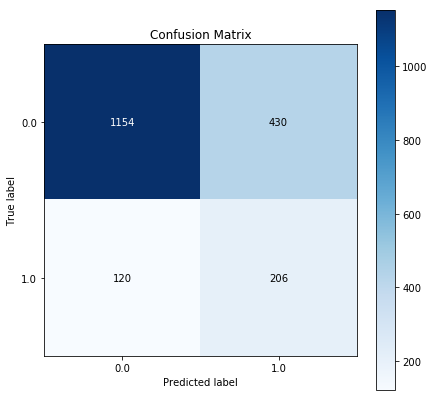

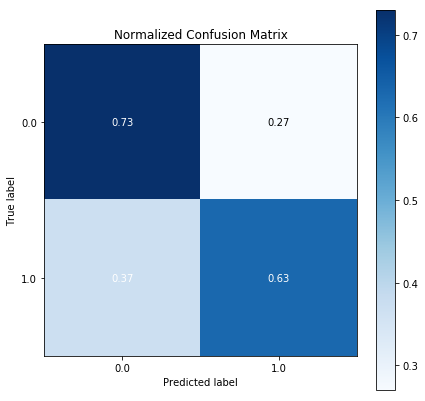

In [29]:
_=skplt.plot_confusion_matrix(logreg.predict(X_test), y_test, figsize=(7,7))
plt.show()
_=skplt.plot_confusion_matrix(logreg.predict(X_test), y_test, figsize=(7,7), normalize = True)
plt.show()

scikit-plot provides a useable confusion matrix for binary classifiers, but not wildly more useful than sklearn.metrics.confusion_matrix textual version.  This is something that I fell becomes more useful for a multi-class classificaiton problem.  Normalize will give % in lieu of whole numbers

## ROC Curve

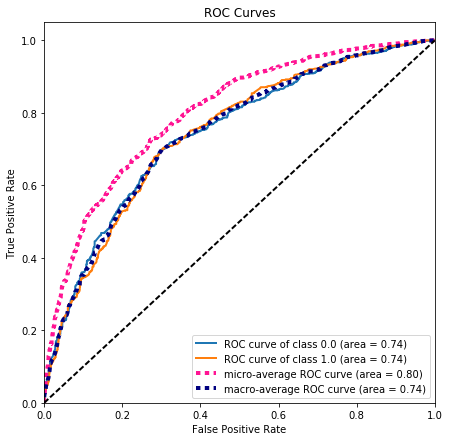

In [7]:
_=skplt.plot_roc_curve(y_test, logreg.predict_proba(X_test), figsize = (7,7))
plt.show()

The ROC Curve  illustrates the performance of a binary classifier system as its discrimination threshold is varied. ROC analysis provides tools to select possibly optimal models and to discard suboptimal ones independently from (and prior to specifying) the cost context or the class distribution. ROC analysis is related in a direct and natural way to cost/benefit analysis of diagnostic decision making.<sup>(1)</sup>

The area under the curve (often referred to as simply the AUC) is equal to the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one<sup>(1)</sup>

AUC can be used to compare one model against another, as the model with the highest AUC could be considered to be the best model... but... if the model has a very high AUC, it could be overfitted/over specified.  With this being logreg, and since that is usually used to predict probabilities, the classification doesnt need to be perfect!

ROC shows trade-offs between sensitivity and specificity. The middle/diagonal line is the plot of a truly random classifier. Anything left/up from there is better than random, and below/right is worse than random<sup>(2)</sup>

<sub>1. https://en.wikipedia.org/wiki/Receiver_operating_characteristic<br>2. https://classeval.wordpress.com/introduction/introduction-to-the-roc-receiver-operating-characteristics-plot/</sub>

## Kolmogorov–Smirnov (KS) Statistic Plot

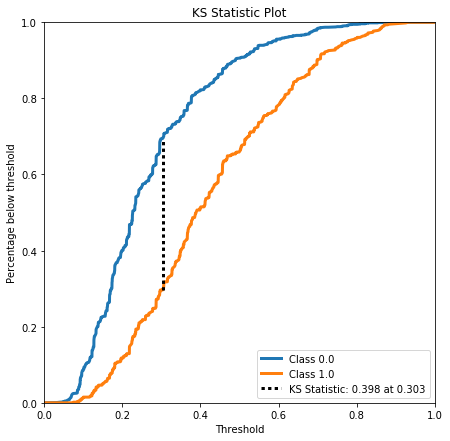

In [8]:
_=skplt.plot_ks_statistic(y_test, logreg.predict_proba(X_test), figsize=(7,7))
plt.show()

The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. The Kolmogorov–Smirnov test can be modified to serve as a goodness of fit test.<sup>(1)</sup>

The Kolmogorov–Smirnov test may also be used to test whether two underlying one-dimensional probability distributions differ. Note that the two-sample test checks whether the two data samples come from the same distribution. This does not specify what that common distribution is (e.g. whether it's normal or not normal).<sup>(1)</sup>

The K-statistic is the absolute max distance between the CDFs, and the closer that the value is to 0, the more likely that the two samples are drawn from the same distribution.

The Kolmogorov-Smirnoff Statistic when used to measure the dicrimatory power of a score card, looks at how the distribution of the score differs among goods and bads. The Kolgomorov Stat measures the maximum point of separation between the CDF of two distributions. See Graphs Below: The Graph Below Shows the cummulative distributions of the observed goods and bads. The K-S Statistic is the maximum separation of these cdfs.<sup>(2)</sup>

K-S or Kolmogorov-Smirnov chart measures performance of classification models. The K-S is 100, if the scores partition the population into two separate groups in which one group contains all the positives and the other all the negatives. On the other hand, If the model cannot differentiate between positives and negatives, then it is as if the model selects cases randomly from the population. The K-S would be 0.<sup>(3)</sup>


<sub>1. https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test <br>2. https://ecomathcompstatfinance.wordpress.com/2013/10/22/models-measure-giniksrank-ordering/ <br>3.https://www.analyticsvidhya.com/blog/2016/02/7-important-model-evaluation-error-metrics/</sub>

## Precision-Recall Curve

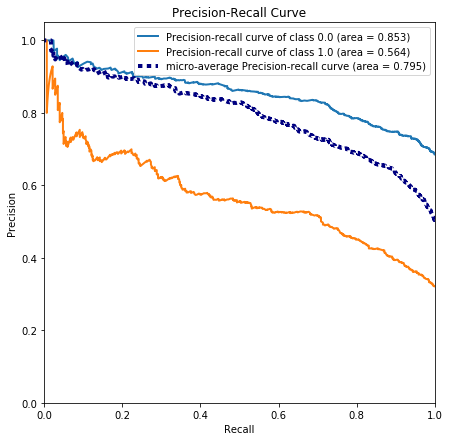

In [9]:
_=skplt.plot_precision_recall_curve(y_test, logreg.predict_proba(X_test), figsize = (7,7))
plt.show()

The precision-recall plot is a model-wide measure for evaluating binary classifiers and closely related to the ROC plot.It is easy to compare several classifiers in the precision-recall plot. Curves close to the perfect precision-recall curve have a better performance level than the ones closes to the baseline. In other words, a curve above the other curve has a better performance level. A precision-recall curve can be noisy (a zigzag curve frequently going up and down) for small recall values. Therefore, precision-recall curves tend to cross each other much more frequently than ROC curves especially for small recall values. Comparisons with multiple classifiers can be difficult if the curves are too noisy. Similar to ROC curves, the AUC (the area under the precision-recall curve) score can be used as a single performance measure for precision-recall curves.<sup>(1)</sup>

The precision-recall curve of a perfect classifier would be a right angle, with the horizaontal and vertical lines at 1.0.  Randomness would be a horizontal line across the middle of the plot at 0.5

In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned. Recall that Precision = tp / (tp+fp) and Recall = tp/(tp+fn)  A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).<sup>(2)</sup> 

Precision-recall curves are typically used in binary classification to study the output of a classifier. In order to extend Precision-recall curve and average precision to multi-class or multi-label classification, it is necessary to binarize the output. One curve can be drawn per label, but one can also draw a precision-recall curve by considering each element of the label indicator matrix as a binary prediction (micro-averaging).<sup>(2)</sup>

<sub></sub>

<sub>1.https://classeval.wordpress.com/introduction/introduction-to-the-precision-recall-plot<br>2.http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html</sub>

## Feature Importance Bar Graph w/ Error Bars

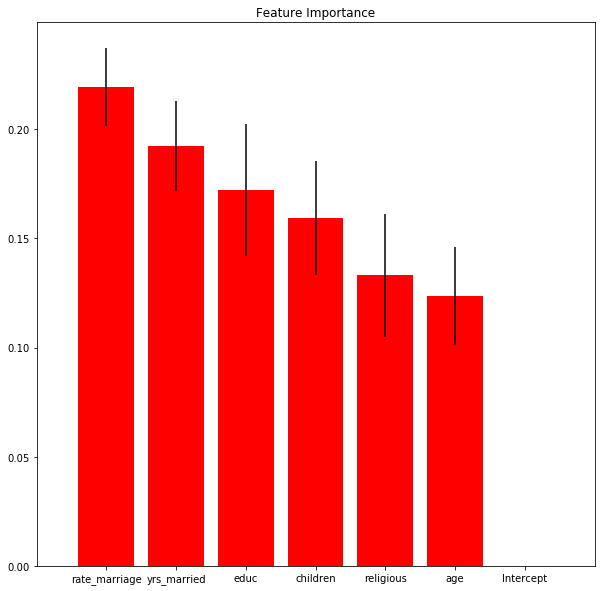

In [10]:
#Doesn't Work with a logistic Regression model, so creating a quick Random Forrest
rf = RandomForestClassifier()
rf.fit(X, y)
skplt.plot_feature_importances(rf, feature_names=X.columns.values, figsize = (10,10))
plt.show()

Random forrest can be used for measuring importance of features as a task in itself<sup>(2)</sup>

The red bars are the feature importances of the forest, along with their inter-trees variability.<sup>(1)</sup>

<sub>1. http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html<br>2. https://www.statistik.uni-dortmund.de/useR-2008/slides/Strobl+Zeileis.pdf</sub>

## Silhouette Analysis

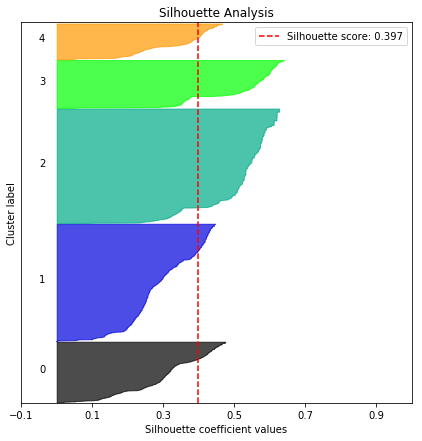

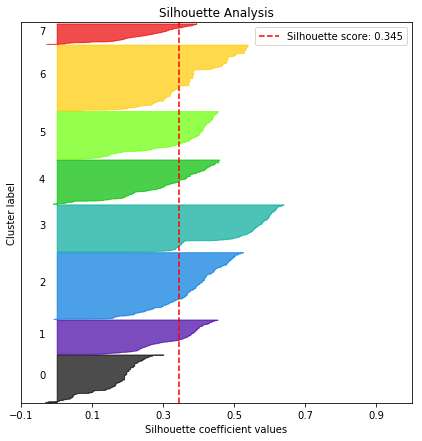

In [11]:
kmeans = KMeans(n_clusters=5, random_state=1)
skplt.plot_silhouette(kmeans, X, figsize = (7,7))
plt.show()
kmeans = KMeans(n_clusters=8, random_state=1)
skplt.plot_silhouette(kmeans, X, figsize = (7,7))
plt.show()

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.<sup>(1)</sup>

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.<sup>(1)</sup>

Also from the thickness of the silhouette plot the cluster size can be visualized.<sup>(1)</sup> 

The 8 cluster set would be bad for 2x reasons:
    1. The first cluster (0) has a below average score
    2. There is a wide fluctuation in the size of the silhouette plots
*Note: the cluster of 4 might be bad as well*

<sub>1. http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html</sub>

## Elbow Plot

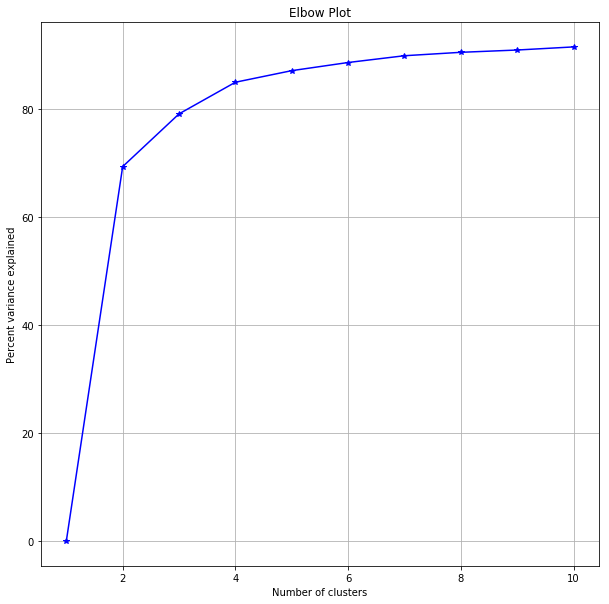

In [12]:
skplt.plot_elbow_curve(kmeans, X, cluster_ranges=range(1, 11), figsize = (10,10))
plt.show()

The elbow method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified.<sup>(1)</sup>

<sub>1. https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set</sub>

## PCA Componenet Explained Variances

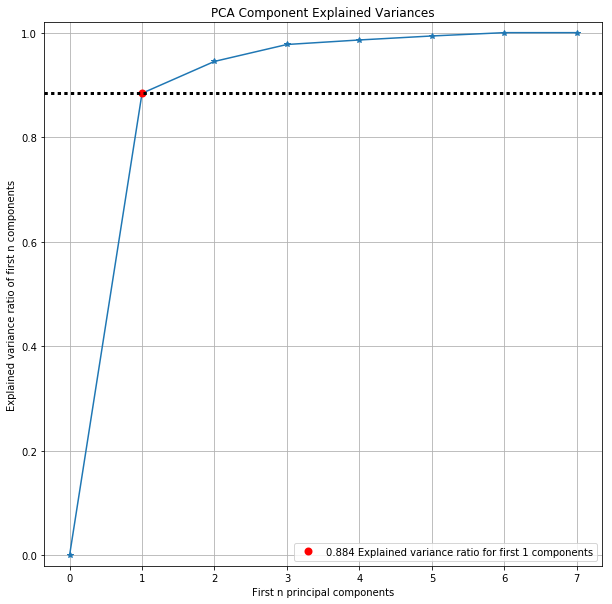

In [13]:
pca = PCA(random_state=1)
pca.fit(X)
skplt.plot_pca_component_variance(pca, figsize = (10,10))
plt.show()

In simple words, principal component analysis is a method of extracting important variables (in form of components) from a large set of variables available in a data set. It extracts low dimensional set of features from a high dimensional data set with a motive to capture as much information as possible. With fewer variables.<sup>(1)</sup>

This plot shows that 1 PCA component explains 88.4% of the variance, and that 2 would explain ~95%, so we could probably just select 1 PCA component to model from.

<sub>1. https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/</sub>

## PCA 2-D Projection

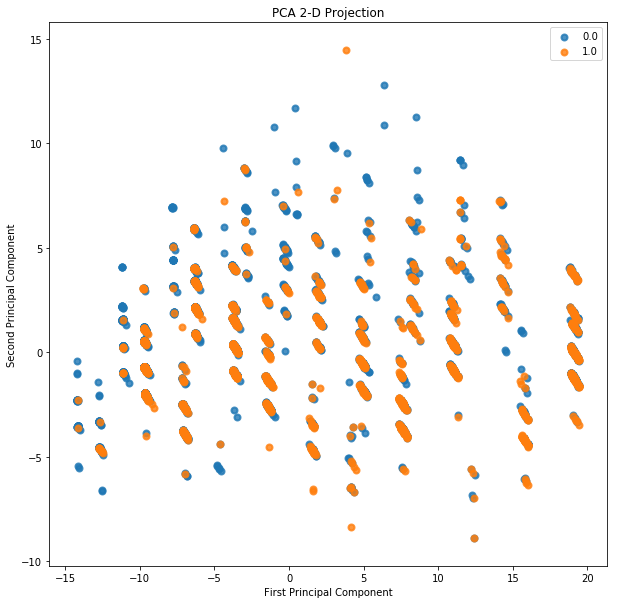

In [14]:
skplt.plot_pca_2d_projection(pca, X, y, figsize = (10,10))
plt.show()

Still working on the full interpretation of this...

# Scikit-Plot Functions on Multi-Class Classification
### Principal model is Random Forrest, sklearn digits dataset

In [30]:
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [31]:
rf= RandomForestClassifier(n_estimators=5, max_depth=5, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

### Confusion Matrix of our Random Forest Classifier, fitted on our data

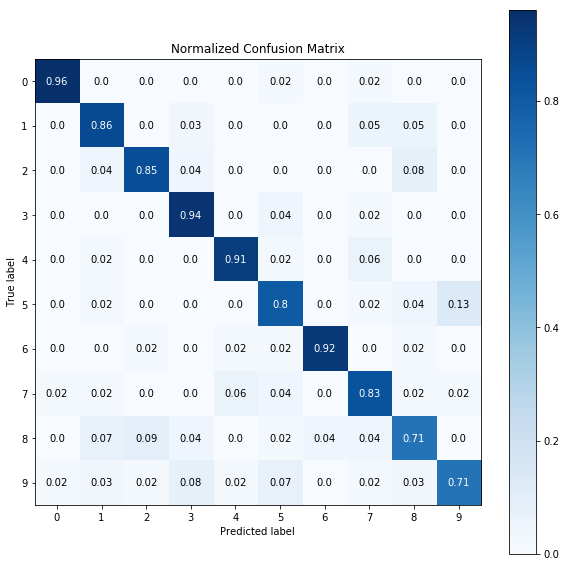

In [32]:
_=skplt.plot_confusion_matrix(rf.predict(X_test), y_test, figsize=(10,10), normalize = True)
plt.show()

This is an easy, visual method to compare predictive accuracy for all of the different classifications.  It appears that our classifier is working reasonably well with most of the predicted classes, with 7 being the poorest performing.

## Feature Importance

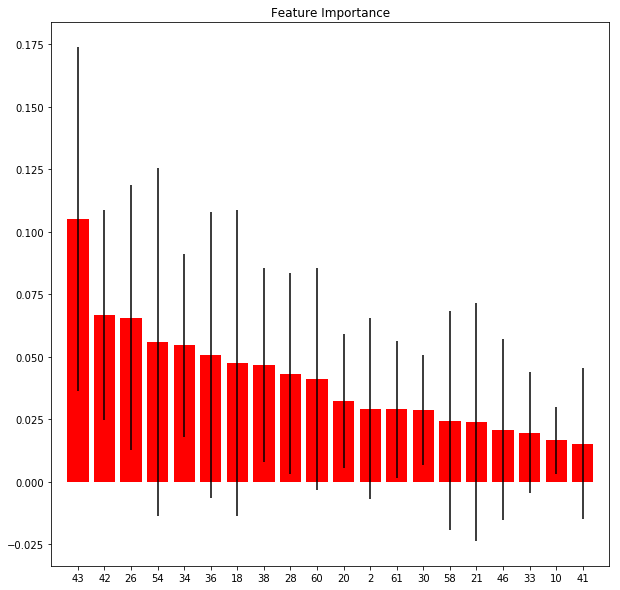

In [34]:
skplt.plot_feature_importances(rf, figsize = (10,10))
plt.show()

In [36]:
X.shape

(1797, 64)

This is a tough one to try and use the Feature importance graph, since there are so many factors. It can give an easy look at some of the mor important ones.

## Silhouette Analysis

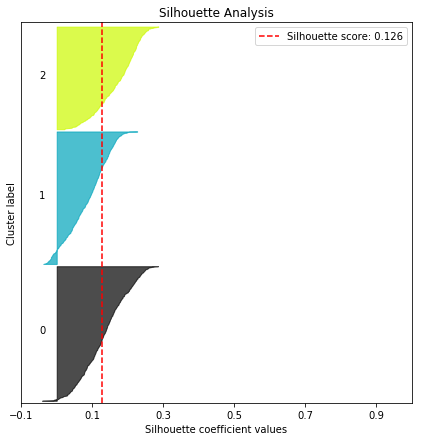

In [40]:
kmeans = KMeans(n_clusters=3, random_state=1)
skplt.plot_silhouette(kmeans, X, figsize = (7,7))
plt.show()

In this case, 3x clusters seems to nicely fit the data where the clusters are of approximately equal size and all above average, but the next plot will show that this is probably not the best model to use

## Elbow Plot

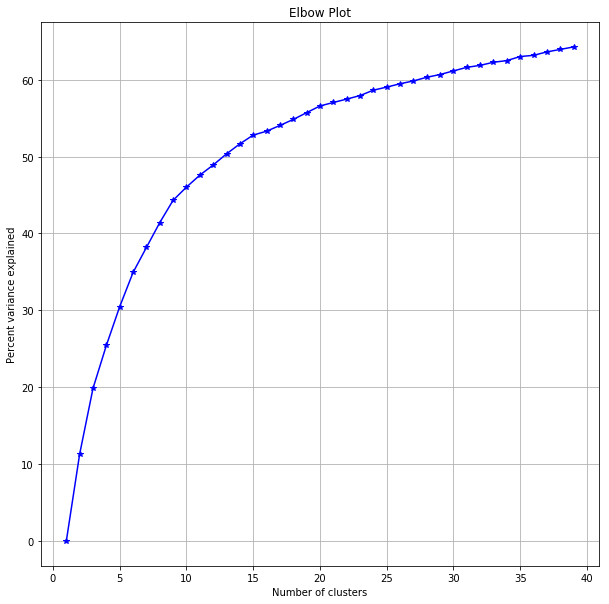

In [43]:
skplt.plot_elbow_curve(kmeans, X, cluster_ranges=range(1, 40), figsize = (10,10))
plt.show()

This might suggest that kmeans is not a good model to use in this case, since there is no clearly define elbow. If forced, I might go with something along the lines of 9-10 clusters.

## PCA Componenet Explained Variances

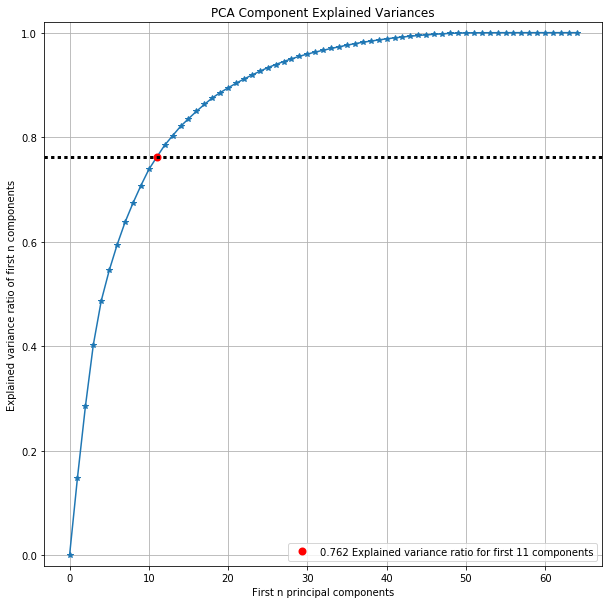

In [44]:
pca = PCA(random_state=1)
pca.fit(X)
skplt.plot_pca_component_variance(pca, figsize = (10,10))
plt.show()

Using PCA we could expect to reduce our 64 original factors down to 11 and stil be able to explain 76.2% of the variance with those factors.  With 40 factors, as opposed to the original 64, we could explain ~99% of the variance